benin data loaded with 525600 rows.
sierra_leone data loaded with 525600 rows.
togo data loaded with 525600 rows.
Combined DataFrame loaded successfully.


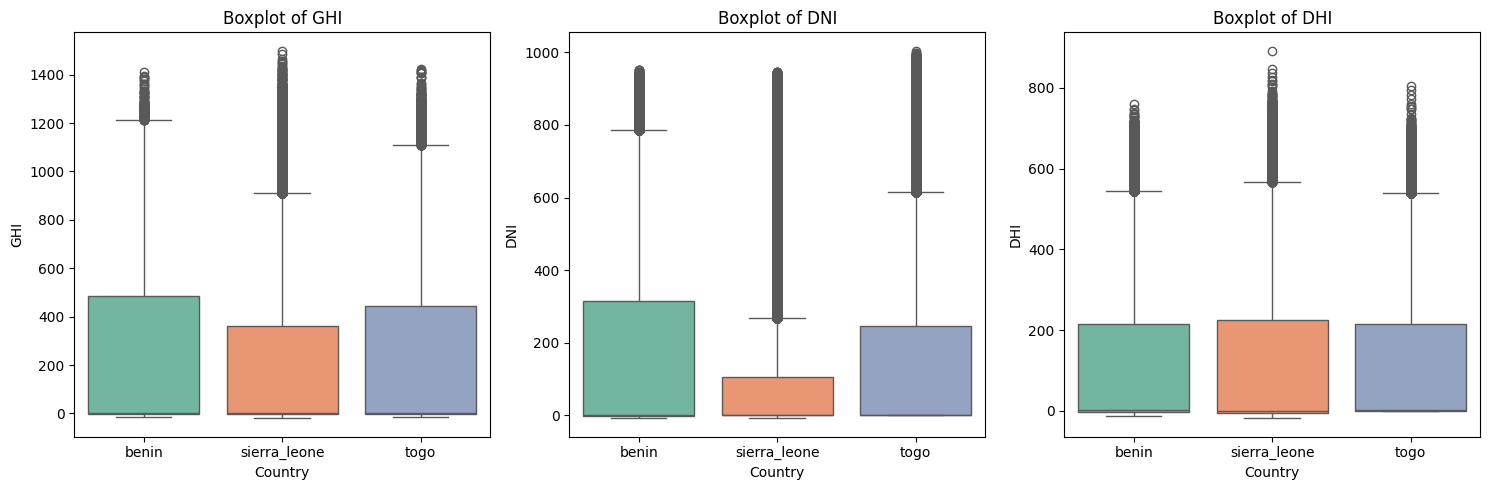

        Country         GHI                            DNI                     \
                       mean median         std        mean median         std   
0         benin  240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
1  sierra_leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
2          togo  230.555040    2.1  322.532347  151.258469    0.0  250.956962   

          DHI                     
         mean median         std  
0  115.358961    1.6  158.691074  
1  113.720571   -0.1  158.946032  
2  116.444352    2.5  156.520714  
ANOVA p-values: {'GHI': np.float64(0.0), 'DNI': np.float64(0.0), 'DHI': np.float64(6.6112375267197736e-18)}
- Benin shows the highest median GHI but also the greatest variability.
- Sierra Leone has the lowest median DNI among the three countries.
- Togo exhibits moderate values across all metrics, with relatively low variability.


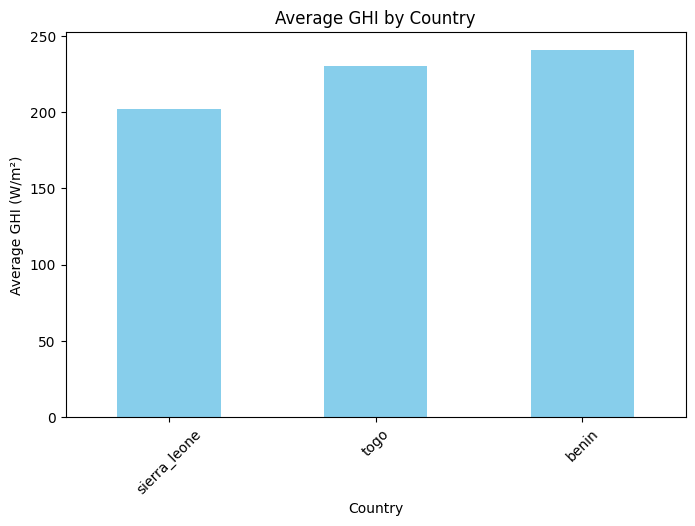

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import os

# Load cleaned datasets with the correct filenames
countries = {
    'benin': 'benin-malanville.csv',
    'sierra_leone': 'sierraleone-bumbuna.csv',
    'togo': 'togo-dapaong_qc.csv'
}
dataframes = {}

for country, filename in countries.items():
    path = Path(f"../data/{filename}")
    if os.path.exists(path):
        dataframes[country] = pd.read_csv(path)
        print(f"{country} data loaded with {dataframes[country].shape[0]} rows.")
    else:
        print(f"File not found: {path}")

# Combining the  datasets
combined_df = pd.concat(dataframes.values(), keys=countries.keys(), names=['Country', 'Index']).reset_index(level=0)

if combined_df.empty:
    print("The combined DataFrame is empty. Please check the individual datasets.")
else:
    print("Combined DataFrame loaded successfully.")

# Droping NaN values
combined_df.dropna(subset=['GHI', 'DNI', 'DHI'], inplace=True)

# Metric Comparison
metrics = ['GHI', 'DNI', 'DHI']

# Boxploting
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=combined_df, x='Country', y=metric, hue='Country', palette='Set2', legend=False)
    plt.title(f'Boxplot of {metric}')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

# summary Table
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).reset_index()
print(summary_stats)

# statistical sesting - One-way ANOVA
anova_results = {}
for metric in metrics:
    if combined_df.groupby('Country')[metric].count().min() < 2:
        print(f"Not enough samples for {metric} to perform ANOVA.")
        anova_results[metric] = None
    else:
        f_val, p_val = stats.f_oneway(*(combined_df[combined_df['Country'] == country][metric] for country in countries.keys()))
        anova_results[metric] = p_val

print("ANOVA p-values:", anova_results)

# key Observations
observations = [
    "Benin shows the highest median GHI but also the greatest variability.",
    "Sierra Leone has the lowest median DNI among the three countries.",
    "Togo exhibits moderate values across all metrics, with relatively low variability."
]

# display observations
for obs in observations:
    print(f"- {obs}")

# Bonus: Visual Summary (Bar Chart for Average GHI)
if not combined_df.empty:
    avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values()
    avg_ghi.plot(kind='bar', color='skyblue', figsize=(8, 5))
    plt.title('Average GHI by Country')
    plt.ylabel('Average GHI (W/m²)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No data available to plot average GHI.")